# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 35

### Load Data

In [2]:
cow_1 = pd.read_json('input/cowrie.json.2017_7_4', lines=True)
cow_3 = pd.read_json('input/cowrie.json.2017_7_6', lines=True)
cow_4 = pd.read_json('input/cowrie.json.2017_7_7', lines=True)

In [3]:
cow = pd.concat([cow_1, cow_3, cow_4])

print ('Data Shape : '+str(cow.shape))

Data Shape : (1058090, 30)


In [4]:
del cow_1, cow_3, cow_4

In [5]:
cow.head()

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:39547 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,"[diffie-hellman-group14-sha1, diffie-hellman-g...","[ssh-rsa, ssh-dss]","[hmac-sha1, hmac-sha1-96, hmac-md5, hmac-md5-9...",Remote SSH version: SSH-2.0-PUTTY,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,NaN,NaN,NaN,login attempt [root/windows98] succeeded,NaN,windows98,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,NaN,NaN,NaN,Connection lost after 9 seconds,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:22040 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,e95d1a25184c,NaN,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


### Event Distribution

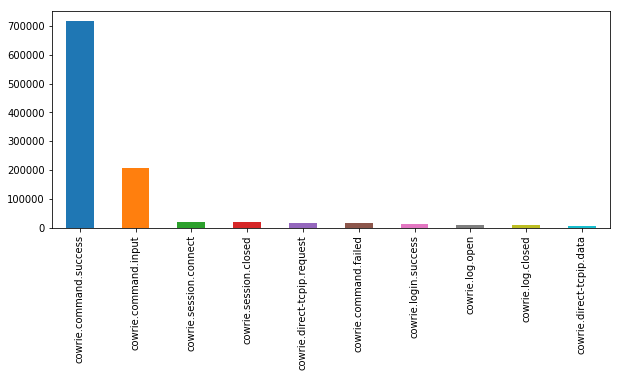

In [6]:
cow['eventid'].value_counts()[:10].plot(kind='bar', figsize=(10, 4))

### Occurrences of Source IPs

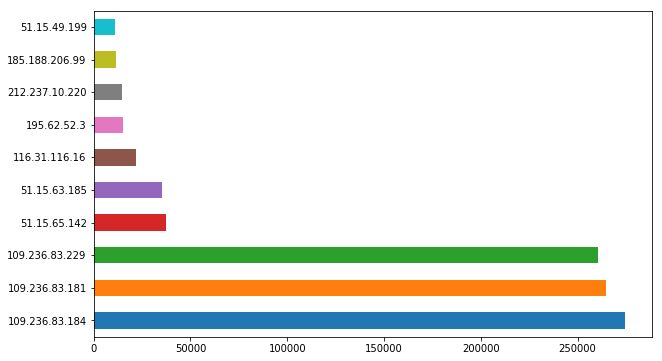

In [13]:
cow['src_ip'].value_counts()[:10].plot(kind='barh', figsize=(10, 6))

### Username Occurrences

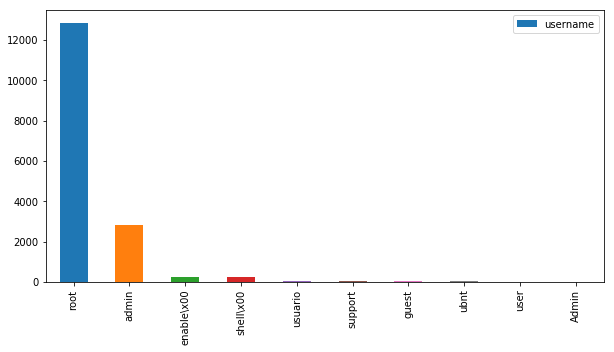

In [20]:
cow['username'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))

### Password Occurrences

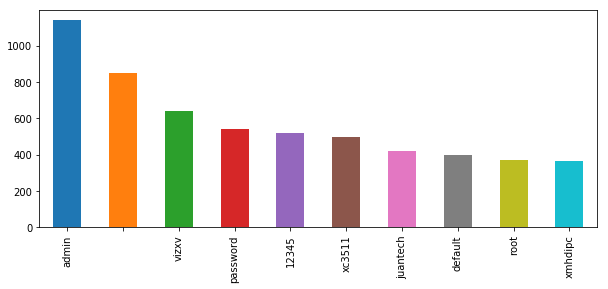

In [16]:
cow['password'].value_counts()[:10].plot(kind='bar', figsize=(10, 4))

### Most Attacked Systems

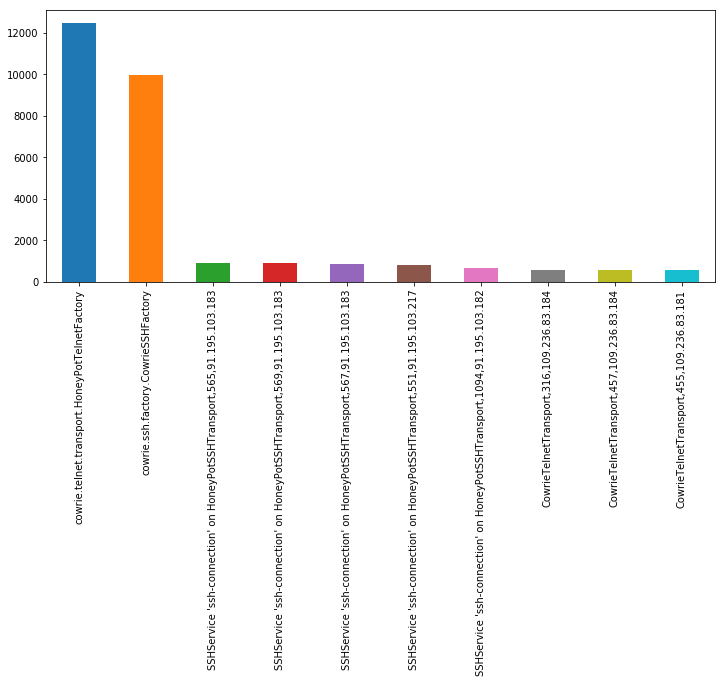

In [108]:
cow['system'].value_counts()[:10].plot(kind='bar', figsize=(12, 5))

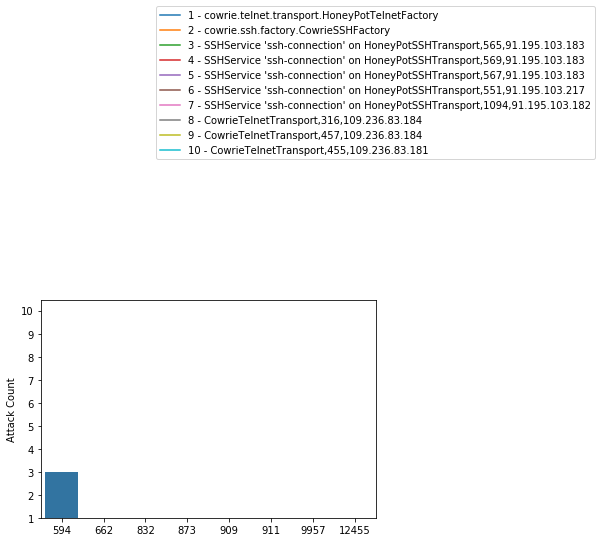

In [95]:
sns.countplot(x['Attack Count'])
plt.plot('1', label ="1 - cowrie.telnet.transport.HoneyPotTelnetFactory")
plt.plot('2', label ="2 - cowrie.ssh.factory.CowrieSSHFactory")
plt.plot('3', label ="3 - SSHService 'ssh-connection' on HoneyPotSSHTransport,565,91.195.103.183")
plt.plot('4', label ="4 - SSHService 'ssh-connection' on HoneyPotSSHTransport,569,91.195.103.183")
plt.plot('5', label ="5 - SSHService 'ssh-connection' on HoneyPotSSHTransport,567,91.195.103.183")
plt.plot('6', label ="6 - SSHService 'ssh-connection' on HoneyPotSSHTransport,551,91.195.103.217")
plt.plot('7', label ="7 - SSHService 'ssh-connection' on HoneyPotSSHTransport,1094,91.195.103.182")
plt.plot('8', label ="8 - CowrieTelnetTransport,316,109.236.83.184")
plt.plot('9', label ="9 - CowrieTelnetTransport,457,109.236.83.184")
plt.plot('10', label ="10 - CowrieTelnetTransport,455,109.236.83.181")

plt.xlabel("")
plt.ylabel("Attack Count")
plt.legend(loc='center', bbox_to_anchor=(1, 2))